# Machine Learning Lab 1

This is a test Jupyter Notebook, which loads a data set (of Iris flowers), trains a Decision Tree and visualises it using Graphviz.

We will be delving into all of these things throughout the unit - for now, the key is just to check that this runs :)

To run code in a cell, just click the cell and hit **SHIFT + ENTER**.

Or... Press the **run** button (play icon when you hover the mouse over a cell).

Alternatively, to run **all** the cells in the notebook.

* In Google Colab: go to the file menu --> **Runtime** --> **Run All**.

* In native Jupyter: go to the file menu --> **Cell** --> **Run All**.

## Imports

In [10]:
# Data and Datasets
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# Validation methods
from sklearn.model_selection import train_test_split

# Metrics
from sklearn import metrics

# Classifiers
from sklearn.tree import DecisionTreeClassifier

# Plotting & utils
import matplotlib as plt
from IPython.display import display
from IPython.display import SVG
from graphviz import Source
from sklearn.tree import export_graphviz

## Loading and processing the dataset

In [11]:
# Loading dataset
dataset = load_iris()
X = dataset.data
y = dataset.target

# Converting into a Pandas DataFrame
dataset_df = pd.DataFrame(data= np.c_[X, y], columns=dataset['feature_names'] + ['target'])

# Converting the target column to int (from float)
dataset_df['target'] = pd.to_numeric(dataset_df['target'], downcast='integer')

# Printing out the top 5 rows of the DataFrame
dataset_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
# Splitting dataset for hold-out validation
X_train, X_test, y_train, y_test = train_test_split(X, # feature matrix
                                                    y, # label vector
                                                    test_size=0.2, # 20% test / 80% traing
                                                    random_state=1, # fixed random seed
                                                    stratify=dataset.target # split dataset proportional to classes
                                                   )

## Creating and running a Decision Tree

In [13]:
# Creating and testing a Decision Tree
model = DecisionTreeClassifier(random_state=1337, max_depth=None)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Printing out performance of the Decision Tree
print("Accuracy: %s" % (metrics.accuracy_score(y_test, y_pred)*100))

Accuracy: 96.66666666666667


## Visualising the Decision Tree

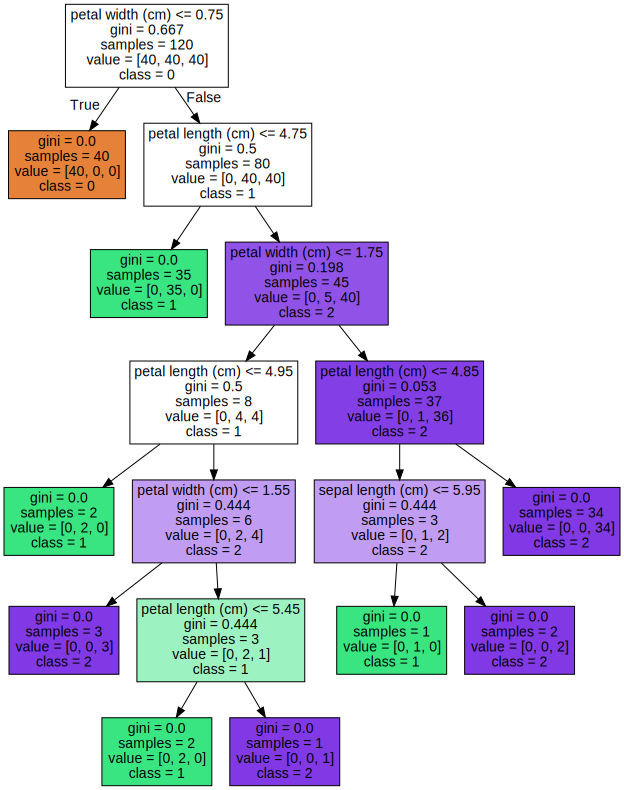

In [14]:
feature_names = list(dataset['feature_names'])
class_labels = ['0', '1', '2']

graph = Source(export_graphviz(model, out_file=None
   , feature_names=feature_names, class_names=['0', '1', '2']
   , filled = True))

graph_svg = SVG(graph.pipe(format='svg'))
display(graph_svg)

## Python code

In [17]:
import random # to generate random numbers with

# TODO: create 'get_results' function here

def get_results(num_results):
  result_array = []
  for i in range(0, num_results):
    n = random.random()
    result_array.append(n)

  return result_array

In [18]:
# TODO: call the 'get_results' function here and print out the results

print(get_results(5))

[0.2685307036280292, 0.06574101593524662, 0.7019813079005883, 0.8557400991339612, 0.8456880156413394]
